## My first project in jupiter notebooks in visual studio
## Lets try running some base analysis to build out first project
## This is a customer segmentaion project for an ecommerce store

In [22]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [24]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [25]:
#lets handle some na values or missing values for our dataset
df.dropna(inplace=True)

In [26]:
#As part of data processing lets do some preparation
#convert the date column to a datetime datatype
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [27]:
#Create a new feature for total purchase amount (product of quantity and unit price)
df['TotalAmount']=df['Quantity']*df['UnitPrice']


In [28]:
#Lets remove negative quantities and prices(assuming they indicate cancellations and refunds)

df=df[df['Quantity']> 0]
df=df[df['UnitPrice']> 0]

## Lets do some exploratory data analysis(EDA)
## we gonna need to visualize our data through plots


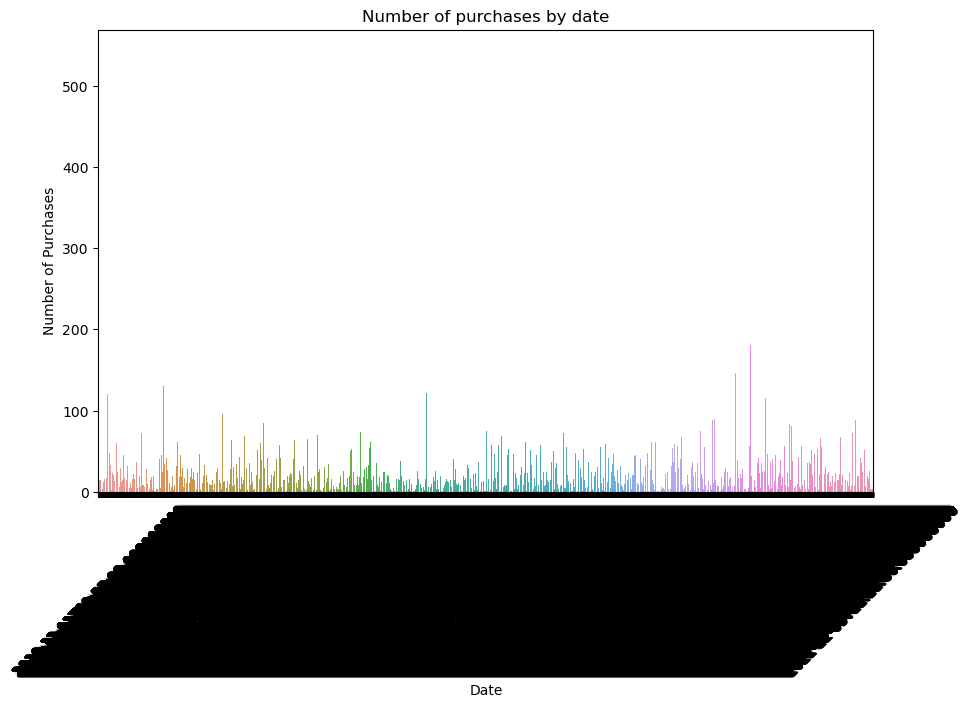

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns 

# lets visualize purchase frequency 

plt.figure(figsize=(10, 6))
sns.countplot(x='InvoiceDate', data=df)
plt.title("Number of purchases by date")
plt.xlabel("Date")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.show()



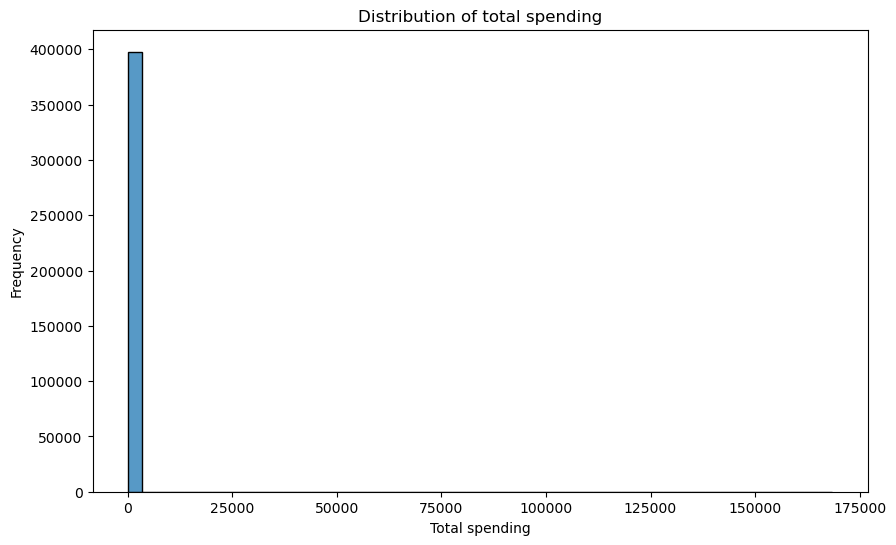

In [30]:
#lets visualize total spending distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalAmount'],bins=50)
plt.title('Distribution of total spending')
plt.xlabel('Total spending')
plt.ylabel('Frequency')
plt.show()

## lets do some customer segmentation(using K-Means)

c:\Users\eKasi_TMB_COM00701\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\eKasi_TMB_COM00701\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\eKasi_TMB_COM00701\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\eKasi_TMB_COM00701\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\U

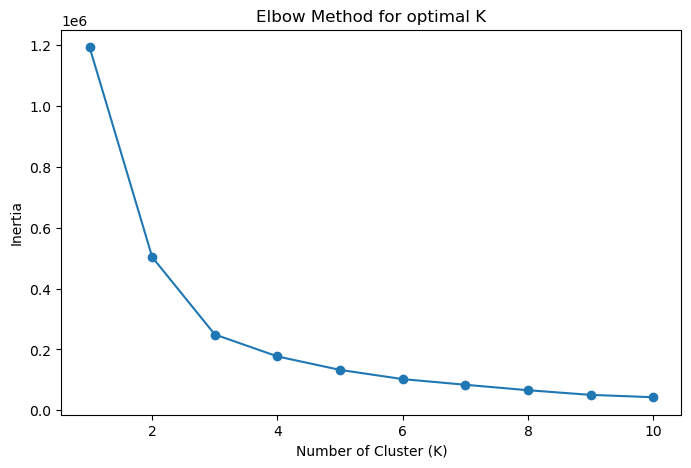

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#lets select the relevant features for clustering 

X = df[['Quantity', 'UnitPrice', 'TotalAmount']]

#lets standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Now determine the optimal number of clusters using the Elbow method 
inertia = []
for k in range(1, 11):
    kmeans= KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for optimal K')
plt.xlabel('Number of Cluster (K)')
plt.ylabel('Inertia')
plt.show()
    

c:\Users\eKasi_TMB_COM00701\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


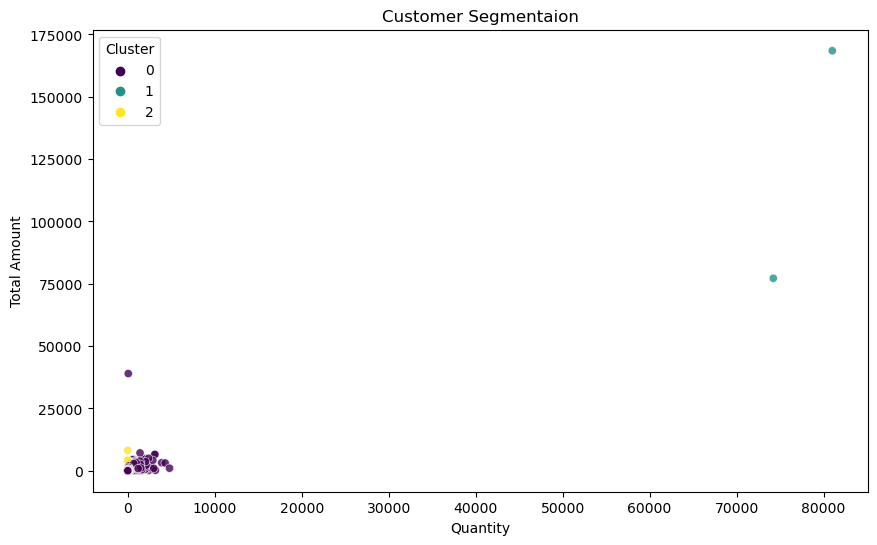

In [32]:
#lets choose the optimal number of cluster and peform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

#lets Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='TotalAmount', hue='Cluster',data=df, palette='viridis',alpha=0.8)
plt.title('Customer Segmentaion')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.show()

## lets do some customer insights and interpretation

In [33]:
#lets analyze some characteristicts of each customer segment
segment_sumarry = df.groupby('Cluster').agg({
    'Quantity': 'mean',
    'UnitPrice': 'mean',
    'TotalAmount':'sum',
    'CustomerID':'nunique'
}).reset_index()

# lets rename the columns for clarity

segment_sumarry.columns = ['Cluster','Avg_Quantity', 'Avg_unitPrice', 'Total_Spending', 'Num_Customers']

print(segment_sumarry)

   Cluster  Avg_Quantity  Avg_unitPrice  Total_Spending  Num_Customers
0        0     12.598679       3.004707     8621228.154           4336
1        1  77605.000000       1.560000      245653.200              2
2        2      1.000000    2782.909375       44526.550              9


## Data visualizaion and repopting 

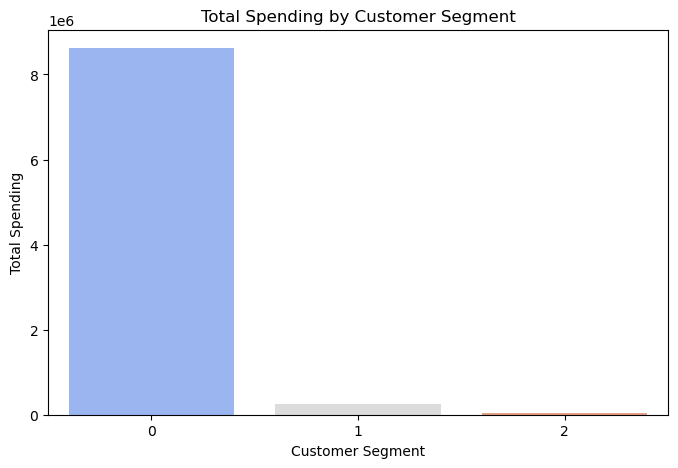

In [34]:
#lets visualize the customer segments
plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='Total_Spending', data=segment_sumarry, palette='coolwarm')
plt.title('Total Spending by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Spending')
plt.show()